# <center> Superstore Data Analysis Project

### Scenario
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid and provide some business insights to improve.

In this case study, we will follow the six steps Data Analysis Process i.e. Ask, Prepare, Process, Analyze, Share, and Act.

## 1)ASK:

Firstly, Is there any profit in establishing a store within these (2014-2017) years?

What is the most purchased segment and the most demanding product in the store?

Who are the top 10 loyal customers of the store?

If I want to open any branches, which region will I be profited?

Which segment is increasing the store's profit?
These are the few questions I came across after looking at the **Superstore dataset**.

## 2)PREPARE:

Then the second phase Prepare which means to collect or use data relevant to the problem we are trying to solve. In this case, we will be using [Superstore Data](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final).Firstly, we need to import **Pandas**, **Numpy**, **Matplotlib** and **Seaborn** in our Python Environment .In this project, I used Jupyter Notebook as an IDE.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("superstore.csv",encoding ="unicode_escape")
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [3]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 3)PROCESS:

The third phase is to process the data. Data processing is to find various inaccuracies, errors, inconsistencies in the data and get rid of them so that our business problem is not affected. 
During this phase,
There are Non-Null values nor duplicate rows.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
#Duplicates
data.drop_duplicates(ignore_index = True,inplace = True)
data.duplicated().sum()

np.int64(0)

In [6]:
#Datetime() should be used for date
data["Order Date"].dtype

dtype('O')

In [7]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

## 4,5)ANALYZE & SHARE:

Now the data is ready for further analysis! The fourth phase is to analyze data by organizing, sorting, filtering and transforming data and the fifth phase is to Share data. We need to create visualizations to share your findings.

### A)Most Purchased Category

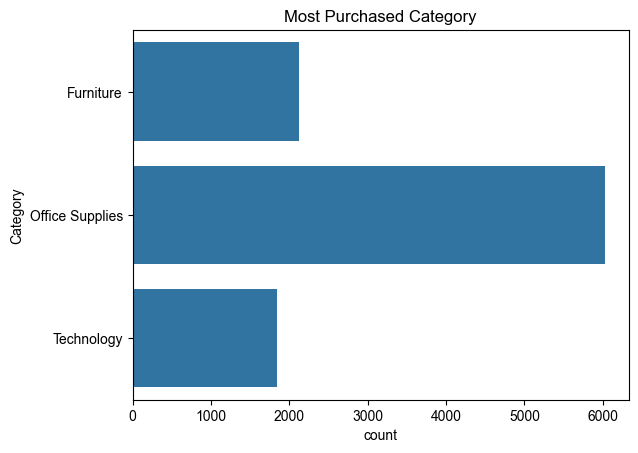

In [8]:
sns.countplot(y= "Category",data = data)
sns.set(rc={"figure.figsize":(5,2)})
plt.title("Most Purchased Category")
plt.show()

Here, the plot provides a snapshot of how products are distributed among different categories and which is the most purchased category from the store.

### B)Most Demanding Items from Sub-Category

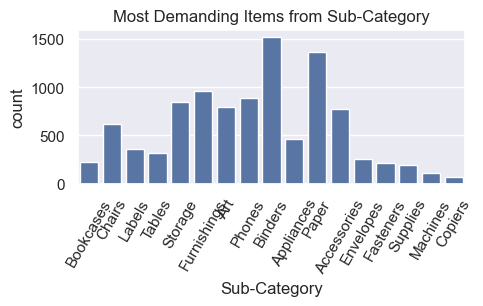

In [9]:
sns.countplot(x = "Sub-Category",data = data)
sns.set(rc ={"figure.figsize":(9,5)})
plt.xticks(rotation=60)
plt.title('Most Demanding Items from Sub-Category')
plt.show()

This figure is the distribution of products across different sub-categories. Therefore, the store manager should make sure it's not falling out of stock due to huge demand.

### C)Total Profitable Segments

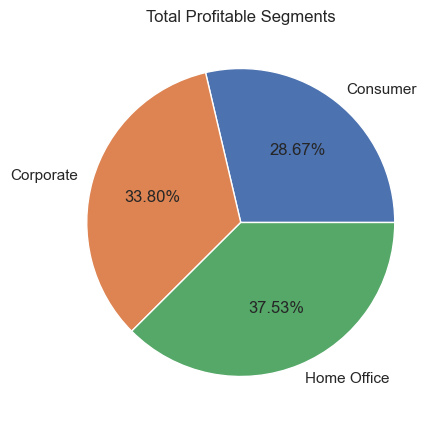

In [19]:
profitable_segment = pd.DataFrame(data.groupby(['Segment'])['Profit'].mean())
plt.pie(profitable_segment.Profit,labels = profitable_segment.index,autopct ="%.2f%%")
plt.title("Total Profitable Segments")
plt.show()

The resulting plot provides a quick and insightful comparison of profitability among various customer segments.

### D)Top 10 Most Loyal Customers

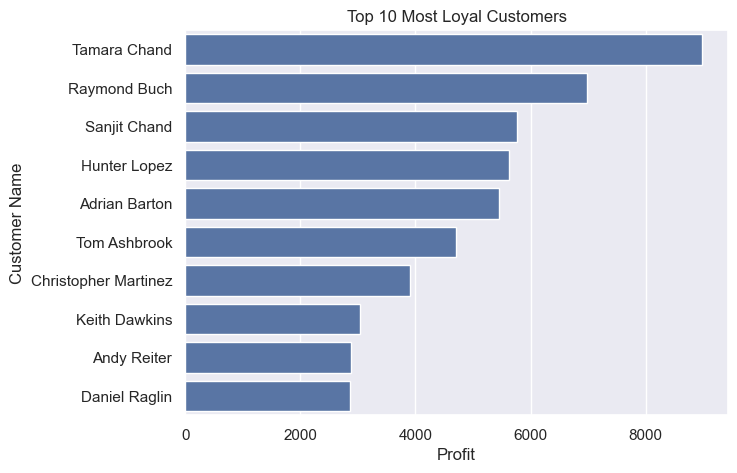

In [20]:
purchased_cust= pd.DataFrame(data.groupby(["Customer Name"])["Profit"].sum())
purchased_cust= purchased_cust.sort_values("Profit",ascending = False).head(10)
sns.barplot(y = "Customer Name",x = "Profit",data = purchased_cust)
sns.set(rc ={"figure.figsize":(9,4)})
plt.title("Top 10 Most Loyal Customers")
plt.show()

Here is a horizontal bar graph representing the top 10 most purchasing from the store.So, I recomend to give any coupons or discounts from the store to increase the number of customers and spread loyality.  

### E)Profit in Different Region

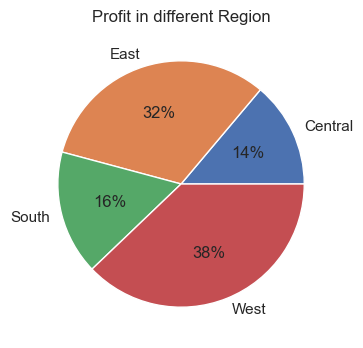

In [12]:
region_sales = pd.DataFrame(data.groupby(["Region"])[["Profit"]].sum())
plt.pie(region_sales.Profit,labels = region_sales.index,autopct = "%.0f%%")
plt.title("Profit in different Region")
plt.show()

This piechart evaluates the profitability generated across different regions — Central, East, South, and West.

### E)Lowest Shipping Mode

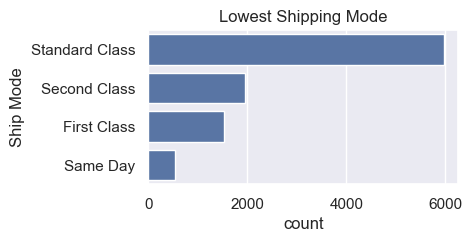

In [24]:
lowest_shipping_modes = data['Ship Mode'].value_counts()
ship_mode = sns.barplot(y=lowest_shipping_modes.index,x = lowest_shipping_modes)
sns.set(rc={"figure.figsize":(4,2)})
plt.title('Lowest Shipping Mode')
plt.show()


This graph predicts the Lowest Shipping mode. So, we can aim to increase our productivity by providing delivery service at ease.

### F)Total Sales & Profit Gained Year-Wise

Here I extracted Year from Order Date and modified the column for simplicity.

In [14]:
data["Order Date"] = data["Order Date"].dt.year
data["Order Date"].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: Order Date, dtype: int32

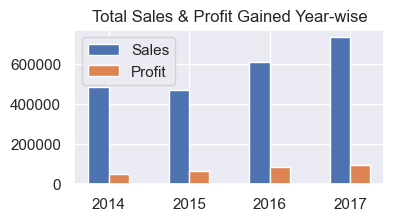

In [25]:
results = data.groupby('Order Date').sum()
results= results.sort_values('Sales', ascending = False)
year=(results.index).tolist()
sales=list(results["Sales"])
profit=list(results["Profit"])
plt.bar([a-0.25 for a in year], sales, width= 0.25, label = 'Sales', align='edge')
plt.bar([a+0.25 for a in year], profit, width= -0.25, label = 'Profit', align='edge')
sns.set(rc={"figure.figsize":(7,5)})
plt.xticks(year)
plt.title('Total Sales & Profit Gained Year-wise')
plt.legend()
plt.show()

The graph provides a clear visual representation of the growth in sales and profit over four years. While sales have increased significantly, profit growth has been more modest, suggesting potential areas for improvement in cost management and operational efficiency.

## 6)ACT:

The sixth phase of data analysis is to use every insight we learnt to solve the problem. We have to provide information that can help them to decide.The following are conclusions drawn from the analysis.

1) From the above visualization, we can see that the West region is making the highest profit with **38%**.

2) We can see that Consumer goods are having the highest share with **38%** whereas Home Office is the lowest share in making profit.

3) In the Lowest Shipping mode i.e Same Day, we can aim to increase our productivity by providing delivery service at ease.

4) I recommend to give any coupons or discounts to the **Top 10 Most Purchasing customers** from the store from the store to increase the number of customers and spread loyality.

5) I recommend the store manager should make sure **The Most Demanding Products** is not falling out of stock due to huge demand.

6) Finally, **Increase in Sales from 500000 Units to 700000 Units** in the last four years i.e (2014-2017).Since profit is not growing as fast as sales, it may indicate rising costs or inefficiencies.